# **FrutoMorph**
## **Trabalho Final - Processamento de Imagens**

### Importação de Bibliotecas

O bloco inicial realiza a importação de todas as bibliotecas necessárias para a manipulação de imagens, gráficos e operações matemáticas.

In [1]:
import matplotlib.pyplot as plt #para exibir as imagens e gráficos
from matplotlib.image import imread #para ler a imagem a partir de um arquivo (PNG por exemplo)
import numpy as np #para manipulação de arrays e operações matemáticas (como arrays)
from skimage import color #para conversões entre diferentes representações de cores (como escala de cinza)
from skimage.draw import circle_perimeter #para desenhar o perímetro (contorno) de círculo na imagem
from skimage.draw import disk  #para gerar os índices dos pixels dentro de um círculo em uma imagem

### Carregamento e Exibição das Imagens

Aqui, a imagem original é carregada do arquivo e convertida para escala de cinza. Em seguida, as duas versões (original e convertida) são exibidas para análise visual:

- **Imagem Original**: Imagem carregada sem alterações.
- **Imagem em Escala de Cinza**: Versão da imagem convertida para escala de cinza.

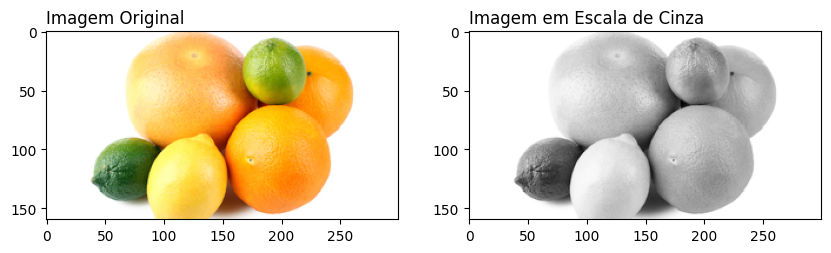

In [2]:
#diretório da imagem
imagem = imread(r"C:\Users\Wemerson\Downloads\FrutoMorph\dataset\frutas0.png")

#converter para escala de cinza
imagem_cinza = color.rgb2gray(imagem)

#exibir a imagem original e a imagem em escala de cinza
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title("Imagem Original", loc="left")

plt.subplot(1, 2, 2)
plt.imshow(imagem_cinza, cmap='gray')
plt.title("Imagem em Escala de Cinza", loc="left")

plt.show()

### **Filtro Mediano**

O **`filtro_mediano`** é uma técnica de processamento de imagens utilizada para reduzir o ruído, especialmente o ruído do tipo "sal e pimenta", preservando bordas e detalhes.

#### **Funcionamento:**
1. **Definição do Kernel**:
   - Um kernel quadrado de tamanho `tamanho_kernel x tamanho_kernel` é definido (padrão: 3x3).
   
2. **Processamento por Janela Deslizante**:
   - Para cada pixel (exceto bordas), uma vizinhança do tamanho do kernel é extraída.
   - Os valores dos pixels na vizinhança são ordenados.
   - O valor mediano da vizinhança substitui o valor original do pixel.

3. **Resultado**:
   - A imagem filtrada mantém características importantes, como contornos e estruturas, reduzindo ruídos pontuais sem distorcer significativamente os detalhes.

Este é um método é amplamente utilizado em pré-processamento para segmentação e detecção de bordas em imagens digitais.

In [3]:
#Filtro Mediano
def filtro_mediano(imagem, tamanho_kernel=3):
    #obter dimensões da imagem
    m, n = imagem.shape
    
    #imagem para armazenar o resultado
    imagem_mediana = np.copy(imagem)

    #raio do kernel
    raio = tamanho_kernel // 2

    #sobre cada pixel (exceto as bordas)
    for i in range(raio, m - raio):
        for j in range(raio, n - raio):
            #extração da região de vizinhança 3x3
            vizinhanca = imagem[i - raio:i + raio + 1, j - raio:j + raio + 1]
            
            #ordenação dos valores da vizinhança para pegar o valor mediano
            imagem_mediana[i, j] = np.median(vizinhanca)
    
    return imagem_mediana

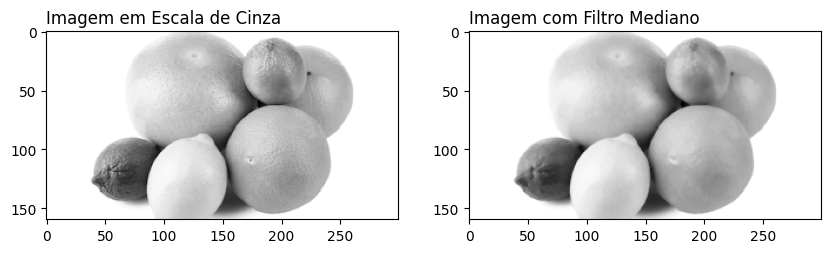

In [4]:
#aplicação do filtro mediano
imagem_com_mediana = filtro_mediano(imagem_cinza, tamanho_kernel=3)

#imagem original e imagem com filtro mediano
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagem_cinza, cmap='gray')
plt.title("Imagem em Escala de Cinza", loc="left")

plt.subplot(1, 2, 2)
plt.imshow(imagem_com_mediana, cmap='gray')
plt.title("Imagem com Filtro Mediano", loc="left")

plt.show()

### **Filtro Sobel**

A função `filtro_sobel` aplica a operação de detecção de bordas utilizando o operador de Sobel. O método consiste em calcular a derivada da imagem em duas direções ortogonais (horizontal e vertical) e, a partir dessas informações, obter a magnitude do gradiente, que realça regiões de transição de intensidade na imagem.

#### **Descrição do Processo:**
1. **Máscaras Sobel**: São utilizadas duas máscaras 3x3, `sobel_x` e `sobel_y`, para calcular os gradientes horizontal e vertical.
2. **Convolução**: Para cada pixel da imagem (exceto nas bordas), aplica-se a máscara correspondente, obtendo as componentes `Gx` (horizontal) e `Gy` (vertical) do gradiente.
3. **Cálculo da Magnitude**: A intensidade da borda é determinada pela magnitude do gradiente, dada por:
   \[
   G = √(Gx² + Gy²)
   \]
   Essa magnitude representa a força da borda em cada ponto da imagem.

#### **Parâmetros:**
- `imagem`: Matriz 2D representando a imagem em escala de cinza.

#### **Retorno:**
- `magnitude_gradiente`: Matriz contendo a intensidade das bordas detectadas.

#### **Exemplo de Aplicação:**
O filtro Sobel é aplicado tanto à imagem original quanto à imagem suavizada com filtro mediano. A suavização reduz o ruído, melhorando a detecção de bordas sem interferências de pequenas variações de intensidade.

##### **Comparação:**
- **Sem Suavização**: A imagem original pode conter ruído, afetando a precisão da detecção de bordas.
- **Com Suavização**: A aplicação prévia de um filtro mediano reduz interferências indesejadas, resultando em um mapa de bordas mais limpo.

A saída final exibe ambas as imagens lado a lado para análise comparativa.

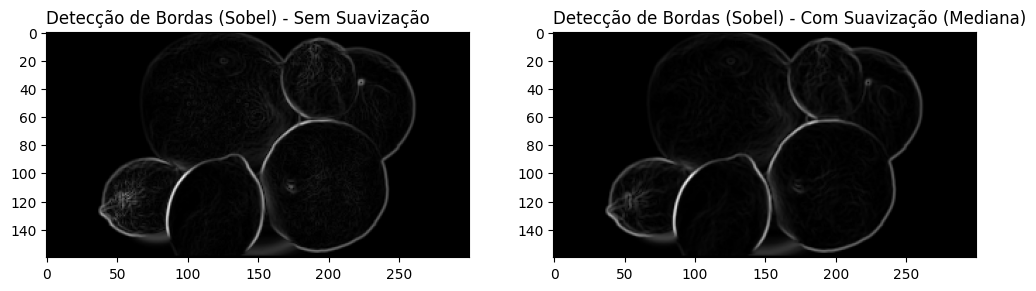

In [5]:
#Filtro Sobel
def filtro_sobel(imagem):
    #máscara Sobel para a direções horizontal(Gx)
    sobel_x = np.array([[-1, 0, 1], 
                        [-2, 0, 2], 
                        [-1, 0, 1]])
    #máscara Sobel para a direções vertical(Gy)
    sobel_y = np.array([[-1,-2,-1], 
                        [ 0, 0, 0], 
                        [ 1, 2, 1]])
    
    #obter dimensões da imagem
    m, n = imagem.shape

    #imagens de saída para Gx e Gy
    gx = np.zeros_like(imagem)
    gy = np.zeros_like(imagem)

    #convolução com as máscaras Sobel
    for i in range(1, m - 1): #ignorar bordas da imagem
        for j in range(1, n - 1):
            regiao = imagem[i - 1:i + 2, j - 1:j + 2] #região 3x3 ao redor do pixel (i, j)
            gx[i, j] = np.sum(regiao * sobel_x) #aplicar máscara Sobel na direção x
            gy[i, j] = np.sum(regiao * sobel_y) #aplicar máscara Sobel na direção y

    #calcular magnitude do gradiente (combinação de Gx e Gy)
    magnitude_gradiente = np.sqrt(gx**2 + gy**2)

    return magnitude_gradiente

#aplicação do filtro Sobel
bordas = filtro_sobel(imagem_cinza)
bordas_suavizadas = filtro_sobel(imagem_com_mediana)

#imagens lado a lado para comparação
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(bordas, cmap='gray')
plt.title("Detecção de Bordas (Sobel) - Sem Suavização", loc="left")

plt.subplot(1, 2, 2)
plt.imshow(bordas_suavizadas, cmap='gray')
plt.title("Detecção de Bordas (Sobel) - Com Suavização (Mediana)", loc="left")

plt.show()

### **Histograma da Imagem**

Um histograma é gerado para a imagem de bordas, permitindo analisar a distribuição das intensidades de pixel na imagem após a aplicação do filtro Sobel. O histograma é uma representação gráfica das intensidades de pixel presentes na imagem.

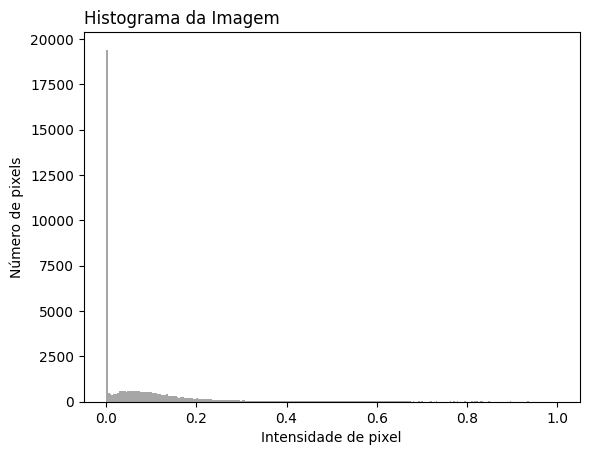

In [6]:
#histograma
def exibir_histograma(imagem):
    #calcular histograma da imagem (intensidades de pixel)
    plt.hist(imagem.ravel(), bins=256, range=(0, 1), color='grey', alpha=0.7)
    plt.xlabel('Intensidade de pixel')
    plt.ylabel('Número de pixels')
    plt.show()

plt.title("Histograma da Imagem", loc="left")

#histograma da imagem de bordas
exibir_histograma(bordas)

### **Binarizacao**

A função `binarizacao` converte a imagem de entrada em uma imagem binária. Primeiramente, ela normaliza os valores de intensidade da imagem para o intervalo [0, 1], e então aplica um limiar para determinar quais pixels se tornam 1 (branco) e quais se tornam 0 (preto). A binarização é útil para destacar características específicas, como bordas ou formas, eliminando informações de intensidade menos relevantes.

#### Parâmetros:
- `imagem`: A imagem de entrada, que deve estar em escala de cinza.
- `limiar`: O valor de intensidade que define o ponto de corte para a binarização.

#### Retorno:
- A imagem binária gerada após a aplicação do limiar.

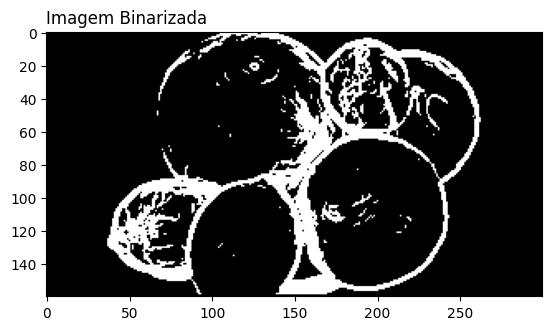

In [7]:
#binarização
def binarizacao(imagem, limiar=None):
    #normalizar imagem, se necessário
    imagem_normalizada = imagem / np.max(imagem) #normaliza para o intervalo [0, 1] se não for já
    
    if limiar is None:
        limiar = 0.05 * np.max(imagem_normalizada) #definir limiar como 5% do valor máximo da imagem

    imagem_binaria = np.zeros_like(imagem_normalizada)
    
    #a binarização será 1 (branca) se o valor da borda for maior que o limiar
    imagem_binaria[imagem_normalizada > limiar] = 1
    
    return imagem_binaria

#aplicação da binarização
binaria = binarizacao(bordas_suavizadas)

#imagem binarizada
plt.imshow(binaria, cmap='gray')
plt.title("Imagem Binarizada", loc="left")
plt.show()

### **Histograma da Imagem Binarizada**

O histograma da imagem binarizada representa a distribuição de pixels entre os dois níveis de intensidade (0 e 255) e permite analisar a proporção de áreas escuras e claras na imagem binarizada.

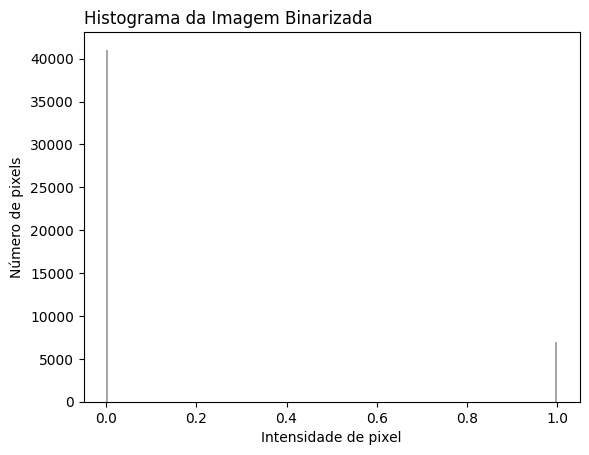

In [8]:
plt.title("Histograma da Imagem Binarizada", loc="left")
#histograma da imagem de Binarizada
exibir_histograma(binaria)

### **Transformada de Hough Circular (CHT)**

A **Transformada de Hough Circular** é um método utilizado para detectar círculos em imagens binárias. A função `hough_circular()` implementa esse processo acumulando votos para possíveis centros de círculos ao longo de um intervalo de raios especificado.

#### **Funcionamento da Função `hough_circular()`**:
1. **Inicialização**:
   - A imagem binária é percorrida para identificar os pixels de borda (`imagem > 0`).
   - Uma matriz acumuladora tridimensional é criada para armazenar votos para diferentes coordenadas de centro e raios.

2. **Acúmulo de Votos**:
   - Para cada pixel de borda `(i, j)`, são calculados possíveis centros `(a, b)` para cada raio `r` dentro do `intervalo_raio`.
   - Os centros são determinados variando `θ` de 0° a 360° e utilizando as equações:
     \[
     a = i − r ⋅ cos(θ)
     \]
     \[
     b = j − r ⋅ sin(θ)
     \]
   - Apenas centros dentro dos limites da imagem são considerados.
   - A matriz `acumulador` é atualizada somando votos para cada centro candidato.

3. **Visualização dos Resultados**:
   - O acumulador correspondente a um raio específico (por exemplo, `50` pixels) é extraído.
   - A imagem da matriz acumuladora para esse raio é exibida, destacando as regiões com maior número de votos, indicando prováveis centros de círculos.

A função `hough_circular()` é fundamental para detecção automática de formas círculares em imagens e pode ter diversas aplicações no reconhecimento de objetos.

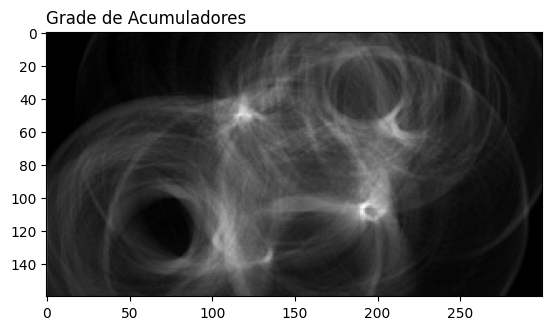

In [9]:
#Transformada de Hough Circular (CHT)
def hough_circular(imagem, intervalo_raio):
    m, n = imagem.shape #obter dimensões da imagem (m: altura, n: largura)
    acumulador = np.zeros((m, n, len(intervalo_raio))) #inicializa matriz do acumulador

    #obter índices dos pixels de borda (onde o valor é maior que zero)
    pixels_borda = np.argwhere(imagem > 0)

    #para cada pixel de borda, calcular os possíveis centros dos círculos
    for (i, j) in pixels_borda:
        for r_index, r in enumerate(intervalo_raio): #para cada raio no intervalo de raios
            #calcular os centros do círculo para cada ângulo de 0 a 360 graus
            thetas = np.arange(0, 360, 1) #cria vetor de ângulos de 0 a 360 graus
            a = (i - r * np.cos(np.deg2rad(thetas))).astype(int) #coordenada x (horizontal) do centro
            b = (j - r * np.sin(np.deg2rad(thetas))).astype(int) #coordenada y (vertical) do centro

            #filtrar índices da imagem para garantir que o centro está dentro dos limites
            mascara_valida = (0 <= a) & (a < m) & (0 <= b) & (b < n)
            a_valido = a[mascara_valida]
            b_valido = b[mascara_valida]

            #acumular votos nos centros válidos (dentro da imagem)
            for ai, bi in zip(a_valido, b_valido):
                acumulador[ai, bi, r_index] += 1  #incrementa valor do acumulador para o centro (ai, bi)

    return acumulador #retorna a matriz acumuladora

#intervalo de raios de 25 a 60 pixels
intervalo_raio = np.arange(25, 60, 1)

#executando a Transformada de Hough Circular na imagem binária
acumulador = hough_circular(binaria, intervalo_raio)

#definir o raio desejado para visualização (um valor central para a análise)
raio_desejado = 50  #raio dentro do intervalo 50 px

#encontrar o índice correto dentro do intervalo
indice_raio = np.where(intervalo_raio == raio_desejado)[0][0]  #achar índice do raio 50

#visualizar a grade de acumuladores para o raio escolhido
plt.imshow(acumulador[:, :, indice_raio], cmap='gray')
plt.title(f"Grade de Acumuladores", loc="left")
plt.show()

### **Centros dos Circulos**

A função `encontrar_centros_circulos` analisa a matriz acumuladora gerada pela Transformada de Hough Circular para encontrar os centros dos círculos. Ela localiza os pontos máximos na matriz de acumulação, que representam as posições de centros dos círculos mais prováveis. Apenas os pontos com um número significativo de votos são considerados, para evitar falsas detecções.

#### Parâmetros:
- `acumulador`: A matriz de acumulação resultante da aplicação da Transformada de Hough Circular.
- `limiar_votos`: O número mínimo de votos necessários para considerar um centro como válido.

#### Retorno:
- Uma lista de tuplas contendo as coordenadas dos centros detectados, juntamente com os raios dos círculos.

In [10]:
#encontrar os centros dos círculos na matriz acumuladora com base em um limiar
def encontrar_centros_circulos(acumulador, intervalo_raio, limiar):   
    centros = []
    #para cada raio, procura-se os pontos máximos na matriz acumuladora
    for r_index in range(acumulador.shape[2]):
        max_acum = np.max(acumulador[:, :, r_index])
        
        #só considera os picos com votos acima de um certo limiar
        if max_acum >= limiar * max_acum:
            #obter índices de todos os pontos com valor máximo no acumulador
            pontos_maximos = np.argwhere(acumulador[:, :, r_index] == max_acum)
            for (x, y) in pontos_maximos:
                centros.append((x, y, intervalo_raio[r_index])) #adiciona o centro e o raio correspondente

    return centros

### **Desenho dos Circulos na Imagem**

A função `desenhar_circulos_e_frutas` recebe a lista de centros e raios dos círculos detectados, além da imagem original, e desenha os círculos sobre a imagem. Para cada círculo detectado, o nome da fruta é exibido na tela com base na cor média da região do círculo. A identificação da fruta é realizada pela comparação da cor média com intervalos de cores predefinidos para diferentes tipos de frutas.

#### Parâmetros:
- `imagem`: A imagem original sobre a qual os círculos serão desenhados.
- `centros`: Lista contendo as coordenadas dos centros dos círculos detectados.
- `radii`: Lista contendo os raios dos círculos detectados.
- `nomes_frutas`: Lista contendo os nomes das frutas correspondentes a cada círculo detectado.

#### Retorno:
- A imagem com os círculos desenhados e os nomes das frutas identificadas sobre a imagem.

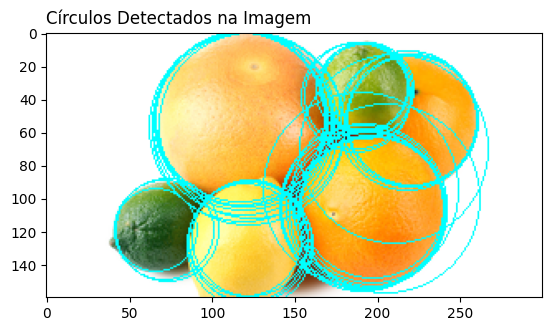

In [11]:
#desenhar círculos na imagem
def desenhar_circulos(imagem, centros_circulos):
    imagem_com_circulos = imagem.copy() #cópia da imagem original para evitar alterações diretas
    
    #verificar se a imagem é do tipo float e os valores estão no intervalo [0, 1]
    if imagem_com_circulos.dtype == np.float32 or imagem_com_circulos.dtype == np.float64:
        if imagem_com_circulos.max() <= 1.0: #se os valores estão no intervalo [0, 1]
            imagem_com_circulos = (imagem_com_circulos * 255).astype(np.uint8) #convertendo para o intervalo [0, 255]
    
    for (x, y, r) in centros_circulos:
        #calcular perímetro do círculo usando a função circle_perimeter
        rr, cc = circle_perimeter(x, y, r, shape=imagem.shape)
        
        #garantir que os índices estão dentro da imagem
        rr = np.clip(rr, 0, imagem.shape[0] - 1)
        cc = np.clip(cc, 0, imagem.shape[1] - 1)
        
        #desenhar o círculo (marcando pixels do perímetro)
        imagem_com_circulos[rr, cc] = [0, 255, 255] #círculo turquesa (RGB)

    return imagem_com_circulos

#encontra os centros dos círculos com votos acima de 99% do máximo no acumulador
centros = encontrar_centros_circulos(acumulador, intervalo_raio, limiar=0.99)
#desenhar os círculos na imagem original
imagem_com_circulos = desenhar_circulos(imagem, centros)

#exibir imagem com círculos
plt.imshow(imagem_com_circulos)
plt.title("Círculos Detectados na Imagem", loc="left")
plt.show()

### **Eliminação de Círculos Próximos**

A função `eliminar_circulos_proximos()` é utilizada para remover detecções redundantes na Transformada de Hough Circular, garantindo que apenas círculos bem distintos sejam considerados.

#### **Funcionamento da Função `eliminar_circulos_proximos()`**:
1. **Iteração sobre os círculos detectados**:
   - Cada círculo identificado pela Transformada de Hough Circular é comparado com aqueles já filtrados.
   - A verificação é feita com base na **distância euclidiana** entre os centros dos círculos:
     \[
     d = √(x1 - x2)² + (y1 - y2)²
     \]
   - Se a distância entre dois centros for **menor que um limite pré-definido** (`distancia_minima`), o círculo mais recente **não** é adicionado à lista de círculos filtrados.

2. **Filtragem dos Círculos**:
   - Apenas círculos que não estejam muito próximos de outros são mantidos na lista `centros_filtrados`.

3. **Aplicação da Função e Exibição dos Resultados**:
   - A função é aplicada para remover círculos sobrepostos.
   - Os círculos resultantes são desenhados na imagem original.
   - O número total de objetos detectados (frutas, neste caso) é exibido.

Este procedimento melhora a precisão na contagem de objetos circulares ao evitar múltiplas detecções para a mesma estrutura, sendo essencial para aplicações como **contagem de frutas, células e detecção de padrões circulares** em imagens.

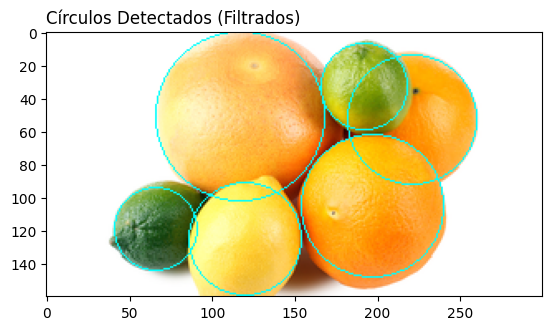

Frutas detectadas: 6


In [12]:
#eliminar círculos próximos
def eliminar_circulos_proximos(centros, distancia_minima=10):
    centros_filtrados = []
    #para cada círculo detectado
    for i, (x1, y1, r1) in enumerate(centros):
        #verifica se o círculo está suficientemente distante de outros
        adicionar = True
        for x2, y2, r2 in centros_filtrados:
            #calcular a distância entre os centros dos círculos
            distancia = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
            if distancia < distancia_minima:
                adicionar = False
                break
        if adicionar:
            centros_filtrados.append((x1, y1, r1))  #adiciona o círculo à lista
    return centros_filtrados

#aplicar eliminação de círculos próximos
centros_filtrados = eliminar_circulos_proximos(centros, distancia_minima=35) #aqui foi ajustada manualmente ;(
#desenhar os círculos filtrados na imagem original
imagem_com_circulos_filtrados = desenhar_circulos(imagem, centros_filtrados)

#exibição
plt.imshow(imagem_com_circulos_filtrados)
plt.title("Círculos Detectados (Filtrados)", loc="left")
plt.show()

#número de frutas detectadas
print(f"Frutas detectadas: {len(centros_filtrados)}")

### **Função `calcular_cor_media`**

A função `calcular_cor_media` calcula a cor média de todos os pixels dentro de um círculo na imagem original. A média de cores é obtida por meio do cálculo da média dos valores RGB dos pixels dentro da máscara do círculo. Essa cor média é então convertida para o modelo de cor HSV, e os valores resultantes são utilizados para classificar a fruta com base em intervalos de cor predefinidos.

#### Parâmetros:
- `imagem`: A imagem original da qual as cores serão extraídas.
- `centro`: A coordenada (x, y) do centro do círculo.
- `raio`: O raio do círculo a ser analisado.

#### Retorno:
- O valor médio de cor (em formato RGB ou HSV) dos pixels dentro do círculo.

In [13]:
#calcular a cor média dentro de um círculo
def calcular_cor_media(imagem, centro, raio):
    rr, cc = disk(centro, raio, shape=imagem.shape)  #usa disk para pegar a área interna do círculo
    rr = np.clip(rr, 0, imagem.shape[0] - 1)
    cc = np.clip(cc, 0, imagem.shape[1] - 1)
    return np.mean(imagem[rr, cc], axis=0)  #calcular a cor média diretamente

### **Identificação de Frutas por Cor Média (HSV)**

A função `identificar_fruta()` classifica uma fruta com base em sua **cor média** convertida para o espaço de cor **HSV (Hue, Saturation, Value)**. 

#### **Etapas da Função `identificar_fruta()`**:
1. **Conversão RGB → HSV**:
   - A cor média da fruta, originalmente em **RGB**, é convertida para **HSV** usando `color.rgb2hsv()`.
   - O canal **Hue (Matiz)** define a cor principal no intervalo **0° a 360°**.
   - Os canais **Saturation (Saturação)** e **Value (Luminosidade)** indicam intensidade e brilho.

2. **Classificação por Luminosidade**:
   - Se **Value < 0.5**, a cor é considerada **escura**.
   - Caso contrário, a cor é classificada como **clara**.

3. **Identificação por Intervalos de Hue e Saturação**:
   - **0° ≤ Hue ≤ 20° (claro):** Maçã *(vermelho claro)*
   - **0° ≤ Hue ≤ 15° ou 250° ≤ Hue ≤ 350° (escuro, Saturação alta):** Ameixa *(vermelho escuro/roxo)*
   - **10° ≤ Hue ≤ 20° (Saturação baixa):** Kiwi *(marrom)*
   - **20° < Hue ≤ 43° (Saturação alta):** Laranja *(tons alaranjados)*
   - **43° < Hue ≤ 60° (Saturação alta):** Limão Siciliano *(amarelo intenso)*
   - **40° < Hue ≤ 60° (Saturação baixa):** Pera *(amarelo pálido)*
   - **60° < Hue ≤ 150°:** Limão *(tons de verde)*
   - Caso nenhum critério seja atendido, a função retorna **"Fruta de Cor Mista"**.

Esse método permite classificar frutas de forma eficiente com base na cor predominante.

In [14]:
#identificar a fruta com base na cor média (usando HSV)
def identificar_fruta(cor_media):
    hsv = color.rgb2hsv(cor_media[np.newaxis, np.newaxis, :])[0, 0, :] #converter a cor média de RGB para HSV
    hue, saturation, value = hsv[0] * 360, hsv[1], hsv[2]  # h em 0-360, s em 0-1, v em 0-1

    #determinar se a cor é escura ou clara com base no valor (luminosidade)
    if value < 0.5: #tom mais escuro
        luminosidade = "escura"
    else: #cor mais clara
        luminosidade = "clara"

    #intervalos de cor para identificação das frutas de acordo com o valor de hue (matiz)
    if 0 <= hue <= 20 and luminosidade == "clara":
        return "Maçã" #vermelho mais claro (Maçã)
    
    if ((0 <= hue <= 15) or (250 <= hue <= 350)) and luminosidade == "escura" and saturation > 0.5:
        return "Ameixa"  #variações de vermelho escuro, roxo ou magenta

    if 10 <= hue <= 20 and saturation < 0.3:
        return "Quiwi"  #tons de marrom saturação baixa
        
    if 20 < hue <= 43 and saturation > 0.3: 
        return "Laranja" #tons de laranja

    if 43 < hue <= 60 and saturation > 0.4: 
        return "Limão Siciliano" #tons de amarelo forte e saturado
    
    if 40 < hue <= 60 and saturation < 0.4: 
        return "Pera" #tons de amarelo suave e pastel (saturação baixa)
    
    if 60 < hue <= 150: 
        return "Limão" #tons de verde

    return "Fruta de Cor Mista" #se a cor não corresponder a nenhum intervalo definido

### **Desenho de Círculos e Identificação de Frutas**

A função `desenhar_circulos_e_frutas()` realiza a marcação de frutas detectadas em uma imagem e identifica suas respectivas categorias com base na cor.

#### **Processo da Função**:
1. **Cópia e Normalização da Imagem**:
   - Se a imagem estiver em formato `float` com valores entre **0 e 1**, ela é convertida para **uint8 [0, 255]**.

2. **Desenho dos Círculos**:
   - Para cada centro detectado `(x, y, r)`, a função calcula a circunferência do círculo usando `circle_perimeter()`.
   - As coordenadas são ajustadas para permanecer dentro dos limites da imagem.
   - O contorno do círculo é desenhado na cor **amarela `[0, 255, 255]`**.

3. **Identificação da Fruta**:
   - A função `calcular_cor_media()` extrai a cor média da região interna do círculo.
   - A cor média é utilizada na função `identificar_fruta()` para determinar o nome da fruta.

4. **Anotação da Imagem**:
   - O nome da fruta identificada é desenhado sobre a imagem usando `plt.text()` com fonte branca e centralizada.

Essa abordagem permite visualizar e classificar frutas em imagens automaticamente, sendo útil para sistemas de processamento de imagens aplicados a reconhecimento de objetos.

In [15]:
#desenhar círculos e identificar frutas
def desenhar_circulos_e_frutas(imagem, centros):
    imagem_com_circulos = imagem.copy()
    
    if imagem_com_circulos.dtype in [np.float32, np.float64] and imagem_com_circulos.max() <= 1.0:
        imagem_com_circulos = (imagem_com_circulos * 255).astype(np.uint8)  #convertendo para [0, 255] se necessário
    
    for (x, y, r) in centros:
        rr, cc = circle_perimeter(x, y, r, shape=imagem.shape) #cálculo da circunferência
        rr = np.clip(rr, 0, imagem.shape[0] - 1)
        cc = np.clip(cc, 0, imagem.shape[1] - 1)
        
        imagem_com_circulos[rr, cc] = [0, 255, 255]  #desenha circunferência
        cor_media = calcular_cor_media(imagem, (x, y), r) #calcula cor média da área interna
        fruta = identificar_fruta(cor_media)  #identifica fruta com base na cor média
        
        plt.text(y, x, fruta, color="white", fontsize=8, ha="center", va="center")  #escreve o nome da fruta
    
    return imagem_com_circulos

### **Exibição e Salvamento da Detecção de Frutas**

A imagem processada, com círculos e rótulos das frutas detectadas, é exibida e salva.

- **Detecção e Identificação**: `desenhar_circulos_e_frutas(imagem, centros_filtrados)`.
- **Exibição**: `plt.imshow()` e `plt.title()` mostram a imagem e a contagem de frutas.
- **Salvamento**: `plt.savefig()` armazena o resultado sem bordas extras.
- **Renderização**: `plt.show()` finaliza a visualização.

O código integra **processamento de imagens** para identificação automática de frutas.

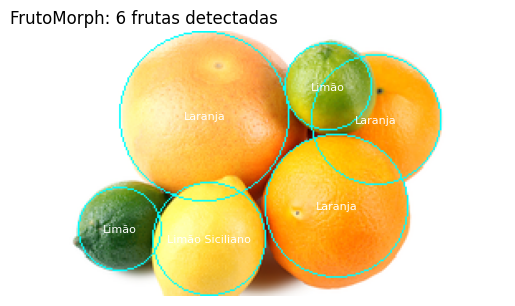

In [16]:
#desenha círculos nas posições dos centros detectados e identifica as frutas com base na cor média de cada círculo
imagem_com_circulos_e_frutas = desenhar_circulos_e_frutas(imagem, centros_filtrados)

#exibição da imagem com círculos e nomes de frutas
plt.imshow(imagem_com_circulos_e_frutas)
plt.title(f"FrutoMorph: {len(centros_filtrados)} frutas detectadas", loc="left") #exibir o número de frutas detectadas
plt.gca().axis('off')
plt.savefig(r"C:\Users\Wemerson\Downloads\FrutoMorph\detected\deteccao.png", bbox_inches='tight', pad_inches=0)
plt.show()

### **Resultados e Finalização**

A análise de frutas foi realizada com base em técnicas clássicas de processamento de imagens, como a transformada de Hough e a detecção de bordas, demonstrando a eficácia dessas abordagens para a identificação das frutas. No entanto, desafios como sobreposição de frutas, variações de cor e texturas complexas impactaram a precisão do algoritmo. O uso de filtros medianos e a análise de cor no espaço HSV ajudaram a mitigar algumas dessas limitações, mas melhorias são necessárias, especialmente para classificar frutas com cores semelhantes.

Futuras melhorias podem incluir ajustes mais precisos nos parâmetros, como intervalos de cor e refinamento na detecção de bordas. Além disso, técnicas de filtragem mais robustas podem ser exploradas para lidar com imagens mais complexas ou com sobreposição de objetos. A otimização de desempenho também pode ser alcançada integrando o código Python com C, uma linguagem compilada que oferece maior velocidade de execução em operações intensivas de processamento de imagens.

Essas melhorias contínuas garantirão maior robustez nas detecções e expandirão a aplicabilidade do algoritmo para cenários mais desafiadores.

*Wemerson Soares | 202300084020*